In [62]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [63]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [64]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [65]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [66]:



df = getQuotes(frameM30, 2023)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
9872,1697472000,1.05414,1.05436,1.05351,1.05375,4272,9,0
9873,1697473800,1.05374,1.05384,1.05277,1.05295,5124,9,0
9874,1697475600,1.05295,1.05399,1.05252,1.05390,4745,9,0
9875,1697477400,1.05390,1.05551,1.05384,1.05493,5198,9,0


In [67]:


def sma(df, label='', lookback=50):
    df[label] = ta.sma(close=df['close'], length=lookback)
    return df


In [68]:
s=50
l=100

df = sma(df, 'smas', s)
df = sma(df, 'smal', l)

df = df.dropna()

df


,time,open,high,low,close,tick_volume,spread,real_volume,smas,smal
99,1672795800,1.05444,1.05476,1.05415,1.05453,2843,7,0,1.059181,1.063524
100,1672797600,1.05453,1.05573,1.05450,1.05555,3323,7,0,1.058965,1.063386
101,1672799400,1.05556,1.05609,1.05555,1.05578,2191,7,0,1.058728,1.063254
102,1672801200,1.05578,1.05652,1.05568,1.05614,2894,7,0,1.058514,1.063119
103,1672803000,1.05614,1.05692,1.05604,1.05664,3642,7,0,1.058306,1.062983
...,...,...,...,...,...,...,...,...,...,...
9872,1697472000,1.05414,1.05436,1.05351,1.05375,4272,9,0,1.052161,1.053277
9873,1697473800,1.05374,1.05384,1.05277,1.05295,5124,9,0,1.052146,1.053188
9874,1697475600,1.05295,1.05399,1.05252,1.05390,4745,9,0,1.052182,1.053104
9875,1697477400,1.05390,1.05551,1.05384,1.05493,5198,9,0,1.052230,1.053072


In [69]:

buyIndices=[]
sellIndices=[]

buys=[]
sells=[]

position = None

sl = 0.5 / 100
tp = 1.5 / 100

slamount = None
tpamount = None

for i in range(len(df)):
    if (i > 0) and (position is None) and (df.iloc[i]['smas'] > df.iloc[i]['smal']) and (df.iloc[i - 1]['smas'] < df.iloc[i - 1]['smal']):
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
        position = 'long'
        slamount = df.iloc[i]['close'] - (sl * df.iloc[i]['close'])
        tpamount = df.iloc[i]['close'] + (tp * df.iloc[i]['close'])
    if (i > 0) and (position == 'long') and (
        (
            (df.iloc[i]['smas'] < df.iloc[i]['smal']) and
            (df.iloc[i - 1]['smas'] > df.iloc[i - 1]['smal'])
        ) or (
            df.iloc[i]['close'] <= slamount
        ) or (
            df.iloc[i]['close'] >= tpamount
        )
    ):
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])
        position = None
        slamount = None
        tpamount = None
        


In [70]:

print(buys)
print(sells)

print(buyIndices)
print(sellIndices)


[1.06257, 1.06697, 1.07955, 1.08285, 1.08991, 1.08919, 1.07184, 1.07315, 1.06788, 1.06093, 1.0633, 1.05681, 1.06482, 1.08146, 1.08886, 1.09159, 1.09135, 1.09745, 1.09631, 1.10393, 1.10234, 1.10373, 1.09842, 1.08759, 1.08225, 1.07302, 1.07346, 1.06983, 1.07671, 1.06788, 1.07084, 1.0778699999999999, 1.09703, 1.09088, 1.09071, 1.08842, 1.10873, 1.10279, 1.09448, 1.09765, 1.09275, 1.08992, 1.08542, 1.08052, 1.07121, 1.07474, 1.06724, 1.06496, 1.05638, 1.05154, 1.06105]
[1.05519, 1.08314, 1.08206, 1.08419, 1.0879, 1.0893, 1.06951, 1.0682, 1.06514, 1.0594999999999999, 1.05749, 1.073, 1.08515, 1.08071, 1.08861, 1.09009, 1.09706, 1.09194, 1.09778, 1.1019, 1.1035, 1.0990199999999999, 1.0928, 1.08643, 1.07712, 1.07148, 1.06981, 1.06804, 1.07131, 1.06947, 1.07441, 1.09423, 1.08784, 1.09145, 1.0894, 1.10576, 1.10243, 1.09758, 1.09794, 1.09718, 1.09151, 1.08434, 1.081, 1.08413, 1.07528, 1.0699, 1.0637, 1.06438, 1.05309, 1.05686, 1.05492]
[49, 149, 538, 574, 729, 982, 1231, 1398, 1604, 1874, 2069, 2

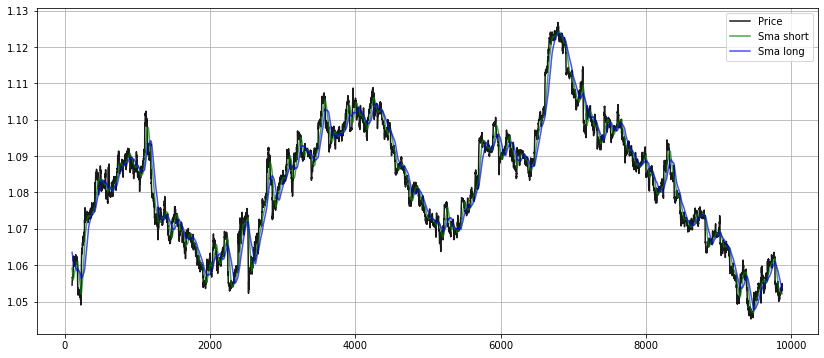

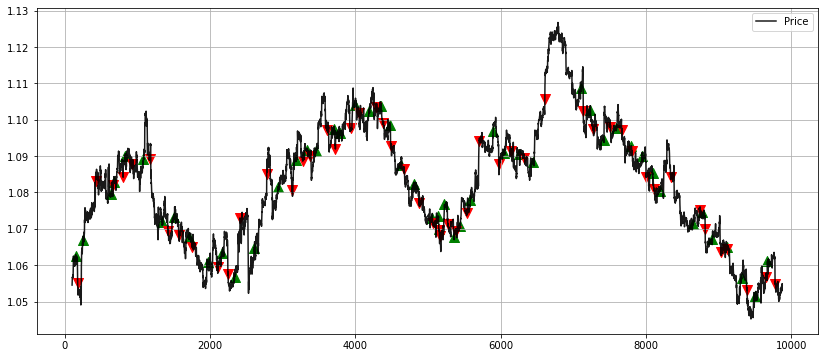

In [71]:


plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.plot(df['smas'], label='Sma short', color='green', alpha=0.7)
plt.plot(df['smal'], label='Sma long', color='blue', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)
plt.legend()
plt.grid(True)
plt.show()


In [72]:




brokerage = 1 / 100

wins = 0
losses = 0

profit = 0
loss = 0

averageprofit = 0
averageloss = 0

netresult = ''

for i in range(len(sells)):
    maximum = max(sells[i], buys[i])
    brokerageAmount = brokerage * maximum
    diff = sells[i] - buys[i] - brokerageAmount
    if (diff > 0):
        wins += 1
        profit += diff
    if (diff < 0):
        losses += 1
        loss += abs(diff)

if (profit > loss):
    netresult = 'Win'
elif (profit == loss):
    netresult = 'None'
else:
    netresult = 'Loss'

averageprofit = profit / wins
averageloss = loss / losses
hitratio = (wins / (wins + losses)) * 100
profitfactor = (profit / loss)
expectancy = (averageprofit * hitratio) - (averageloss * (1 - hitratio))
riskreward = (averageprofit / averageloss)

print(f'''
    Net result = {netresult}
    Hit ratio = {hitratio} %
    Profit factor = {profitfactor} {{currency}}
    Expectancy = {expectancy} {{currency}}
    Realised risk reward ratio = {riskreward} {{currency}}
''')







    Net result = Loss
    Hit ratio = 9.803921568627452 %
    Profit factor = 0.05499970072589481 {currency}
    Expectancy = 0.17397560664961675 {currency}
    Realised risk reward ratio = 0.5059972466782322 {currency}

